In [1]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Import Labels

In [31]:
dataset_dir = '/scratch/smkatz/class/CS231A/E16Data/'
labels = pd.read_csv(dataset_dir + 'labels.csv')

In [32]:
labels

,filename,crosstrack,heading,downtrack,leftx1,lefty1,leftx2,lefty2,rightx1,righty1,rightx2,righty2
0,0.png,-4.521357,-13.384682,250.657815,701.839037,558.436125,738.520273,572.295265,655.502839,558.700963,567.463241,573.646962
1,1.png,0.913144,-28.959157,250.657815,356.764472,560.250233,433.207463,574.560256,299.753953,560.789870,225.265678,577.615792
2,2.png,5.303935,18.729172,250.657815,1385.458131,559.026179,1489.649604,574.164256,1336.422948,558.878512,1307.119709,572.817850
3,3.png,-0.491137,-10.227457,250.657815,775.393188,558.169492,832.711043,571.691143,730.265032,558.389987,667.639808,572.747663
4,4.png,-4.635729,13.189644,250.657815,1243.093763,558.522354,1282.943377,572.913525,1197.152631,558.452534,1116.491650,572.102577
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9995.png,-2.648472,-0.523640,349.536868,970.453241,558.862430,1113.850706,600.440863,918.093871,558.981944,700.951469,601.286701
9996,9996.png,4.000929,12.993361,349.536868,1262.980305,559.409779,1549.064917,605.093153,1207.620013,559.319664,1099.375105,600.460656
9997,9997.png,6.378581,27.007366,349.536868,1597.987988,561.446282,2043.366525,618.415909,1531.088111,561.073185,1453.887748,605.223292
9998,9998.png,0.245740,-11.235758,349.536868,760.697944,559.114655,946.810740,599.298592,706.292959,559.403464,518.200749,604.383029


In [33]:
labels.loc[labels['filename'] == '0.png'].iloc[0]['rightx1']

655.502839

# Visualize Lines

In [34]:
def get_pixels(line, sw):
    a, b, c = line
    xs = np.arange(0, sw, 1)
    ys = [-(a / b) * x + (-c / b) for x in xs]
    return xs, ys

def plot_image_with_label(dataset_dir, filename):
    # Load the image
    img = np.array(cv2.cvtColor(cv2.imread(dataset_dir + filename), cv2.COLOR_BGRA2BGR)[:, :, ::-1])
    # Get the lines for plotting
    data = labels.loc[labels['filename'] == filename].iloc[0]
    rightx1, righty1, rightx2, righty2 = data['rightx1'], data['righty1'], data['rightx2'], data['righty2']
    leftx1, lefty1, leftx2, lefty2 = data['leftx1'], data['lefty1'], data['leftx2'], data['lefty2']
    right_line = np.cross(
        np.array([rightx1, righty1, 1]), np.array([rightx2, righty2, 1]))
    left_line = np.cross(
        np.array([leftx1, lefty1, 1]), np.array([leftx2, lefty2, 1]))
    sw = img.shape[1]
    xright, yright = get_pixels(right_line, sw)
    xleft, yleft = get_pixels(left_line, sw)
    
    plt.figure(figsize=(10, 6))
    plt.imshow(img)
    # plt.scatter([x1, x2], [y1, y2], c='red')
    # plt.scatter([x3, x4], [y3, y4], c='red')
    plt.plot(xright, yright, c='lime', linewidth=2.0)
    plt.plot(xleft, yleft, c='lime', linewidth=2.0)
    # plt.axis('off')


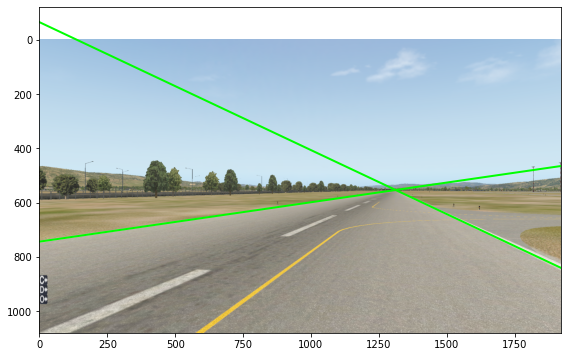

In [37]:
plot_image_with_label(dataset_dir, '9999.png')